##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


# Uczenie głębokie

Jacek Rumiński, Politechnika Gdańska, Wydział ETI, Katedra Inżynierii Biomedycznej

**Wykład 1:** Wprowadzenie do uczenia głębokiego. Operacja splotu i jej znaczenie

**Przykład (1):** Operacja splotu - dane jednowymiarowe


W ramach tego notatnika zaponamy się z metodami dotyczącymi operacji splotu i jej zastosowania w sztucznych sieciach neuronowych na przykładzie danych jednowymiarowych.


Wskażmy pakiety, z jakich będziemy korzystać:

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib


print(tf.__version__)

2.6.0


Rozpocznijmy od definicji prostego przykładu z danymi 1D.



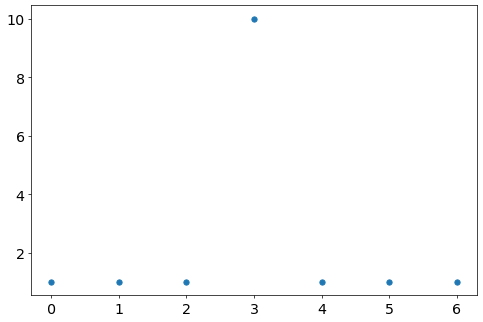

In [ ]:
# An array with 1 signal
signals = np.array([[1.,1.,1.,10.,1.,1.,1. ]])
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(9, 6), dpi=64)
plt.scatter(np.linspace(0,len(signals[0])-1,len(signals[0])), signals[0])
plt.show()


Zgodnie z informacjami przedstawionymi w czsie prezentacji operacja splotu może być zapisana jako :
$${h[n]=(f*g)[n]=\sum _{m=-M}^{M}f[m]g[n-m].}$$

Dla każdej istniejącej próbki n, obliczamy nową wartość - wynik operacji splotu.

W uproszczeniu mieszamy dwa sygnały: sygnał wejściowy oraz sygnał dodatkowy nazywany maską (ang. mask), jądrem (ang. kernel), itp. Maska może przykładowo reprezentować dane filtru.

Ze względu na własności operacji splotu możemy ją również zapisać w formie:

$${h[n]=(f*g)[n]=\sum _{m=-M}^{M}f[n-m]g[m].}$$

Warto ponadto zauważyć, że w pierwszym wzorze próbki danych maski są przetwarzane geometrycznie (odbijane - 180 stopni) w procesie splotu.  

Oczywiscie jeśli jądro/maska zawiera symetryczny układ wartości to nie ma potrzeby realizować tej operacji. W takiej sytuacji możemy się w praktyce posłużuyć operacją korelacji wzajemnej:

$${h[n]= (f \otimes g)[n]=\sum _{m=-M}^{M}f[m]g[n+m].}$$

Zilustrujmy te operacji posługując się prostym przykładem.


In [ ]:
# Let's define the filter mask - kernel - g function
kernel = np.array([1.,1.,1.])
kernel /= np.sum(kernel)

print("Kernel - filter mask values: ", kernel)
print("Kernel size: ", kernel.shape)

Kernel - filter mask values:  [0.33333333 0.33333333 0.33333333]
Kernel size:  (3,)


Zauważmy, że:
1. Rozmiar sygnału wejściowego (np. signals[0]) oraz rozmiar maski są inne
2. Układ wartości w masce jest symetryczny g[n-m] = g[n+m]:

Ponieważ rozmiar maski jest 3, dlatego dla M = 1, m = {-1, 0, 1}.
Wykonajmy "ręcznie" operację splotu dla każdego n.


Rozpatrzmy najpierw krok n = 0:

```Python

h[0] = f[0- (-1)]g[-1] + f[0- (0)]g[0] + f[0- (+1)]g[1]

h[0] = f[1]g[-1] + f[0]g[0] + f[-1]g[1]

```

Pamiętając, że:

```Python
f = signals[0] = [1.,1.,1.,10.,1.,1.,1. ]
```

widzimy, że nie mamy wartości:

f[-1]

dlatego pomijamy n = 0


Zacznijmy od n = 1:
```Python
h[1] = f[1- (-1)]g[-1] + f[1- (0)]g[0] + f[1- (+1)]g[1]

h[1] = f[2]g[-1] + f[1]g[0] + f[0]g[1]

h[1] = 1 * 0.333(3) + 1 * 0.333(3) + 1 * 0.333(3)= 3/3 = 1
```

Następnie:

n = 2
```Python
h[2] = f[2- (-1)]g[-1] + f[2- (0)]g[0] + f[2- (+1)]g[1]

h[2] = f[3]g[-1] + f[2]g[0] + f[1]g[1]

h[2] = 10 * 0.333(3) + 1 * 0.333(3) + 1 * 0.333(3) = 12/3 = 4
```
ITD dla n = {3, 4, 5} aż do

n = 6

```Python
h[6] = f[6- (-1)]g[-1] + f[6- (0)]g[0] + f[6- (+1)]g[1]

h[2] = f[7]g[-1] + f[6]g[0] + f[5]g[1]

```

i znowu nie mamy wartości pod adresem f[7]

czyli pomijamy n = 6.


Ostatecznie uzyskamy:

```Python
h[1]=1, h[2]=4, h[3]=4, h[4]=4, h[5]=1
```

Ponieważ nasza maska jest symetryczna powinniśmy uzyskać ten sam wynik stosując operację korelacji wzajemnej - warto sprawdzić.

Zaimplementujmy to w Pythonie:


In [ ]:
def conv1D(sig, kernel, debug = True):
  # Simplified cross correlation or convolution with a symmetrical kernel
  filtered_signal = []
  kernel_length = len(kernel)

  # Calculate number of locations where the filter_mask covers the input signal
  overlay_positions = len(sig)-kernel_length+1

  for i in range(overlay_positions):

    # This is element wise multiplication (NOT FOR USE HERE - WE NEED SUM):
    # np.multiply(kernel, sig[i:i+kernel_length])
    # or kernel * sig[i:i+kernel_length]

    # This is matrix multiplication:
    # np.matmul(kernel, sig[i:i+kernel_length])
    # or kernel @ sig[i:i+kernel_length]
    # or we can also use here np.dot(kernel, sig[i:i+kernel_length])

    convolution_step = kernel @ sig[i:i+kernel_length]
    filtered_signal.append(convolution_step)

    if debug:
      print("\nSelected signal segment: ", sig[i:i+kernel_length])
      print("Convolution step result: ", convolution_step)

  return np.array(filtered_signal)

In [ ]:
output_signal = conv1D(signals[0], kernel)
print("\nSignal after convolution: ", output_signal)


Selected signal segment:  [1. 1. 1.]
Convolution step result:  1.0

Selected signal segment:  [ 1.  1. 10.]
Convolution step result:  4.0

Selected signal segment:  [ 1. 10.  1.]
Convolution step result:  4.0

Selected signal segment:  [10.  1.  1.]
Convolution step result:  4.0

Selected signal segment:  [1. 1. 1.]
Convolution step result:  1.0

Signal after convolution:  [1. 4. 4. 4. 1.]


Uzyskaliśmy:
- "wygładzoną" wersję sygnału (filtracja dolnoprzepustowa),
- mniej próbek: N - (2 * int(F/2)) ), gdzie N - liczba próbek sygnału wejsciowego, F - rozmiar maski

Możemy następnie:
- dodać (uzupełnić) wartości do sygnału wejściowego tak, aby po operacji splotu uzyskać taki sam rozmiar danych wyjściowych jak wejsciowych
- w tym celu musimy uzupelnić int(F/2) próbek po każdej ze stron sygnału
- oraz musimy wybrać strategię dotyczącą wartości jakie wstawiamy w te uzupełniane miejsca: dodać stałą wartość np. 0 values lub założyć, że sygnał jest okresowy (okres = N) i przed oraz po sygnale są jego kopie, lub dokonać odpbicia sygnału np. stosując jako oś odpbicia początek i koniec sygnału, itp.

Zdefninijmy prostą funkcję realizującą uzupelnianie danych:


In [ ]:
def padding(sig, kernel_length):
  '''
  Padding - Add fixed value =0 at each boundary
  '''
  boundary = int(kernel_length/2)
  output = np.zeros(len(sig)+2*boundary)
  output[boundary:(len(output)-boundary)] = sig
  return output



Zastosujmy prostą operację uzupełniania danych:

In [ ]:
signal_padd = padding(signals[0], 3)
print("Signal with padding: ", signal_padd)

output_signal = conv1D(signal_padd, kernel)
print("\nSignal after convolution: ", output_signal)

Signal with padding:  [ 0.  1.  1.  1. 10.  1.  1.  1.  0.]

Selected signal segment:  [0. 1. 1.]
Convolution step result:  0.6666666666666666

Selected signal segment:  [1. 1. 1.]
Convolution step result:  1.0

Selected signal segment:  [ 1.  1. 10.]
Convolution step result:  4.0

Selected signal segment:  [ 1. 10.  1.]
Convolution step result:  4.0

Selected signal segment:  [10.  1.  1.]
Convolution step result:  4.0

Selected signal segment:  [1. 1. 1.]
Convolution step result:  1.0

Selected signal segment:  [1. 1. 0.]
Convolution step result:  0.6666666666666666

Signal after convolution:  [0.66666667 1.         4.         4.         4.         1.
 0.66666667]


A teraz spróbujmy to zrobić w środowisku TensorFlow (Keras).

Zacznijmy od prostego przykładu realziacji operacji splotu dla określonych STAŁYCH wartości maski (wagi jądra - ang. kernel weights).

Ponieważ TF jak i PyTorch to uniwersalne biblioteki, dlatego klasy realizujące operacje splotu zostały tak zdefiniowane, aby działać na róznych reprezentacjach danych wejściowych. Wymiar (ang. shape) tych danych jest opisywany jako:

* (N, L, C)  dla data_format='channels_last' lub
* (N, C, L)  dla data_format='channels_first',

gdzie:
N - rozmiar batcha,
L - liczba próbek sygnału wejściowego w czasie (1D),
C - liczba kanałów (cech) danych wejsciowych (np. jeśli mierzymy w tym samym czasi przyspieszenie akcelerometrem trójosiowym mamy pomiar dla 3 cech: x, y i z. Czyli 3 próbki danych dla każdej próbki w czasie.).

Zastosujmy klasę Conv1D z pakietu TF w celu ilustracji operacji splotu z maską o stałych wartościach.

In [ ]:
# Input parameters
number_of_samples = signals.shape[1]
number_of_channels = 1  # input dimension
batch_size = 1

# Output parameters
kernel_length = 3
number_of_filters = 1 # output dimension

# Define fixed weights 1/K
w_1 = np.ones((kernel_length, number_of_channels, number_of_filters)).astype(float)

# Normalize the weights (sum = 1) to limit the mean of the result
w_1 /= (np.sum(w_1)/(number_of_filters))
print("\nInput signals shape is: ", signals.shape)
print("\nPredefined weights shape: ", w_1.shape)
print("Predefined weights: \n", w_1)

# We need input shape as (batch_size, number of samples, number of channels)
sig = signals.reshape((batch_size, number_of_samples, number_of_channels))
print("\nInput signals RESHAPED: ", sig.shape)

# Define the Conv1D operation specifing a set of parameters
layer_1 = tf.keras.layers.Conv1D(number_of_filters,
                                  input_shape= signals.shape,
                                  kernel_size=kernel_length,
                                  strides=1,
                                  dilation_rate=1,
                                  padding='valid',
                                  activation='linear',
                                  use_bias=False,
                                  weights=[w_1])

x_1 = layer_1(sig)
print("\nResult shape: ", x_1.shape)
print("Results: \n", x_1)



Input signals shape is:  (1, 7)

Predefined weights shape:  (3, 1, 1)
Predefined weights: 
 [[[0.33333333]]

 [[0.33333333]]

 [[0.33333333]]]

Results shape:  (1, 5, 1)
Results: 
 tf.Tensor(
[[[1.]
  [4.]
  [4.]
  [4.]
  [1.]]], shape=(1, 5, 1), dtype=float32)


Możemy teraz przetestować przykład z większą liczbą cech (kanałów, komponentów) naszego sygnału.

In [ ]:
# The commented example below presents 2 different signals - batch = 2
# signals = np.array([[1,1,1,10,1,1,1 ],[1,1,1,10,1,1,1 ]]).astype(float)

# The exmaple below presents 2 channels (components) per each time sample AND
# 2 signals batch = 2 -> shape (N=2,L=7,C=2)
signals = np.array([[[1,1],[1,1],[1,1],[10,10],[1,1],[1,1],[1,1] ],[[1,1],[1,1],[1,1],[10,10],[1,1],[1,1],[1,1] ]]).astype(float)
print("Input signals: \n",  signals)
print("Input signals shape: ", signals.shape)

Input signals: 
 [[[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]
  [10. 10.]
  [ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]
  [10. 10.]
  [ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]]
Input signals shape:  (2, 7, 2)


In [ ]:
# Input parameters
number_of_samples = signals.shape[1]
number_of_channels = 2  # input dimension
batch_size = 2

# Output parameters
kernel_length = 3
number_of_filters = 1 # output dimension

# Define fixed weights 1/K
w_2 = np.ones((kernel_length, number_of_channels, number_of_filters)).astype(float)

# Normalize the weights (sum = 1) to limit the mean of the result
w_2 /= (np.sum(w_2)/(number_of_filters))
print("\nInput signals shape is: ", signals.shape)
print("\nPredefined weights shape: ", w_2.shape)
print("Predefined weights: \n", w_2)

# We need input shape as (batch_size, number of samples, number of channels)
sig = signals.reshape((batch_size, number_of_samples, number_of_channels))
print("\nInput signals RESHAPED: ", sig.shape)

# Define the Conv1D operation specifing a set of parameters
layer_2 = tf.keras.layers.Conv1D( number_of_filters,
                                  kernel_size=kernel_length,
                                  strides=1,
                                  dilation_rate=1,
                                  padding='valid',
                                  activation='linear',
                                  use_bias=False,
                                  weights=[w_2]
                                 )

x_2 = layer_2(sig)
# Shape of the result (batch_size, number_of_samples_in_signal_after_conv, number_of_filters)
print("\nResults shape: ", x_2.shape)
print("Results: \n", x_2)



Input signals shape is:  (2, 7, 2)

Predefined weights shape:  (3, 2, 1)
Predefined weights: 
 [[[0.16666667]
  [0.16666667]]

 [[0.16666667]
  [0.16666667]]

 [[0.16666667]
  [0.16666667]]]

Input signals RESHAPED:  (2, 7, 2)

Results shape:  (2, 5, 1)
Results: 
 tf.Tensor(
[[[1.]
  [4.]
  [4.]
  [4.]
  [1.]]

 [[1.]
  [4.]
  [4.]
  [4.]
  [1.]]], shape=(2, 5, 1), dtype=float32)


W czasie prezentacji przedstawiliśmy rolę parametrów typowej operacji splotu stosowanej w sztucznych sieciach neuronowych, np. dla klasy Conv1D. Dlatego zachęcamy do eksperymentowania z tymi parametrami (padding, stride, dilation, filters, itd.). Będziemy do tych zagadnień wracać w kolejnych częściach zajęć.


Zilustrujmy działanie operacji splotu dla konkretnego przykładu.

Shape of preprocessed ECG signal (N, L):  (336, 120)


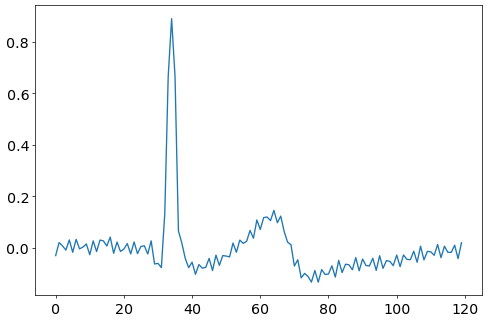

In [ ]:
# We will use a ECG signal example from the very useful BioSPPy package.
# For more information:
# https://github.com/PIA-Group/BioSPPy
# Carreiras C, Alves AP, Lourenço A, Canento F, Silva H, Fred A, et al. BioSPPy - Biosignal Processing in Python, 2015-,
# BioSPPy is released under the BSD 3-clause license: https://github.com/PIA-Group/BioSPPy/blob/master/LICENSE
import pandas as pd

df2 = pd.read_csv("https://raw.githubusercontent.com/PIA-Group/BioSPPy/master/examples/ecg.txt", skiprows=3)
sig = df2.to_numpy().flatten()

# Resample the signal (change the sampling frequency - less samples per second)
from scipy import signal
ecg_signal = signal.resample(sig, int(sig.shape[0]/1000.*120.))

# Cut the long singal into patches (signals with 120 samples)
sample_cut_period = 120
sample_shift = 5
heart_cycles_size = int(ecg_signal.shape[0]/sample_shift)

heart_cycles = []

for i in range(heart_cycles_size-int(sample_cut_period/sample_shift)):
  heart_cycles.append(ecg_signal[i*sample_shift:(i*sample_shift)+sample_cut_period])

heart_data = np.array(heart_cycles)
heart_data -= np.mean(heart_data)
heart_data /= np.max(heart_data)

print("Shape of preprocessed ECG signal (N, L): ", heart_data.shape)


matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(9, 6), dpi=64)
plt.plot(heart_data[0])
plt.show()


Zastosujmy operację opisaną przez Conv1D stosując dwie różne maski splotu.

Najpier, zastosujmy maskę, która doprowadzi do uzyskania efektu uśredniania wartości: np.: [1/3, 1/3, 1/3].

In [ ]:
# Input parameters
number_of_samples_s1 = heart_data.shape[1]
number_of_channels_s1 = 1  # input dimension
batch_size_s1 = heart_data.shape[0]

# Output parameters
kernel_length_s1 = 3
number_of_filters_s1 = 1 # output dimension

# Define fixed weights 1/K
w_1_s1 = np.ones((kernel_length_s1, number_of_channels_s1,
                  number_of_filters_s1)).astype(float)

# Normalize the weights (sum = 1) to limit the mean of the result
w_1_s1 /= (np.sum(w_1_s1)/number_of_filters_s1)

print("\nPredefined weights shape: ", w_1_s1.shape)
print("Predefined weights: \n", w_1_s1)

# We need input shape as (batch_size, number of samples, number of channels)
sig_s1 = heart_data.reshape((batch_size_s1, number_of_samples_s1, number_of_channels_s1))
print("\nInput signals RESHAPED: ", sig_s1.shape)

# Define the Conv1D operation specifing a set of parameters
layer_1_s1 = tf.keras.layers.Conv1D(
                                  number_of_filters_s1,
                                  input_shape= heart_data.shape,
                                  kernel_size=kernel_length_s1,
                                  strides=1,
                                  dilation_rate=1,
                                  padding='valid',
                                  activation='linear',
                                  use_bias=False,
                                  weights=[w_1_s1])

x_1_s1 = layer_1_s1(sig_s1)
print("\nResults shape: ", x_1_s1.shape)
print("Results: \n", x_1_s1)


Predefined weights shape:  (3, 1, 1)
Predefined weights: 
 [[[0.33333333]]

 [[0.33333333]]

 [[0.33333333]]]

Input signals RESHAPED:  (336, 120, 1)

Results shape:  (336, 118, 1)
Results: 
 tf.Tensor(
[[[-0.00173799]
  [ 0.00543812]
  [ 0.0088672 ]
  ...
  [-0.00922956]
  [-0.01745678]
  [-0.00500238]]

 [[ 0.00289101]
  [ 0.00965615]
  [ 0.00372389]
  ...
  [-0.01462081]
  [-0.01062646]
  [-0.00093308]]

 [[-0.00577366]
  [ 0.01319809]
  [ 0.01323335]
  ...
  [ 0.00494338]
  [ 0.0059506 ]
  [ 0.00149894]]

 ...

 [[-0.0005986 ]
  [-0.00123452]
  [ 0.0094304 ]
  ...
  [ 0.00960439]
  [ 0.00218968]
  [ 0.01435731]]

 [[ 0.00406452]
  [ 0.00831405]
  [ 0.00888411]
  ...
  [ 0.00775869]
  [ 0.00466707]
  [ 0.01472578]]

 [[-0.00237948]
  [ 0.01790328]
  [ 0.01993134]
  ...
  [ 0.00814672]
  [ 0.01073317]
  [ 0.01199241]]], shape=(336, 118, 1), dtype=float32)


Przedstawmy wynik dla wybranego przykładu z opisanego wcześniej zbioru danych.

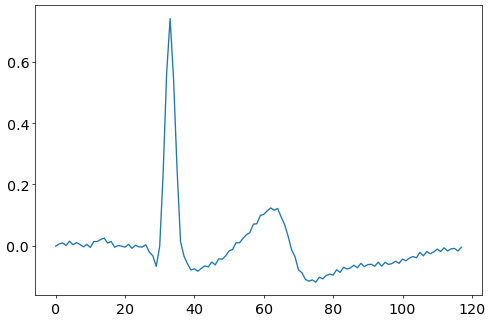

In [ ]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(9, 6), dpi=64)
plt.plot(x_1_s1[0])
plt.show()

Wyraźnie widać, że sygnał EKG jest bardziej "wygładzony", co stanowi efekt zastosowanej przez nas filtracji dolno przepustowej.

Możemy również sprawdzić efekt dla innej maski filtru, która uwypukli róźnice wartości w sygnale wejściowym, np.:  [-1, 2, -1]. W rezultacie uzyskamy operację filtracji górnoprzepustowej.

In [ ]:
# Input parameters
number_of_samples_s1 = heart_data.shape[1]
number_of_channels_s1 = 1  # input dimension
batch_size_s1 = heart_data.shape[0]

# Output parameters
kernel_length_s1 = 3
number_of_filters_s1 = 1 # output dimension

# Define fixed weights
w_2_s1 = np.array([[[1]], [[-2]], [[1]]])

print("\nPredefined weights shape: ", w_2_s1.shape)
print("Predefined weights: \n", w_2_s1)

# We need input shape as (batch_size, number of samples, number of channels)
sig_s1 = heart_data.reshape((batch_size_s1, number_of_samples_s1, number_of_channels_s1))
print("\nInput signals RESHAPED: ", sig_s1.shape)

# Define the Conv1D operation specifing a set of parameters
layer_2_s1 = tf.keras.layers.Conv1D(
                                  number_of_filters_s1,
                                  input_shape= heart_data.shape,
                                  kernel_size=kernel_length_s1,
                                  strides=1,
                                  dilation_rate=1,
                                  padding='valid',
                                  activation='linear',
                                  use_bias=False,
                                  weights=[w_2_s1])

x_2_s1 = layer_2_s1(sig_s1)
print("\nResults shape: ", x_2_s1.shape)
print("Results: \n", x_2_s1)


Predefined weights shape:  (3, 1, 1)
Predefined weights: 
 [[[ 1]]

 [[-2]]

 [[ 1]]]

Input signals RESHAPED:  (336, 120, 1)

Results shape:  (336, 118, 1)
Results: 
 tf.Tensor(
[[[-0.06349842]
  [-0.00348895]
  [ 0.05574626]
  ...
  [ 0.02795817]
  [-0.08018525]
  [ 0.11427198]]

 [[-0.0870927 ]
  [ 0.04373068]
  [ 0.00526982]
  ...
  [-0.04762479]
  [ 0.00150609]
  [ 0.06321578]]

 [[-0.09525013]
  [ 0.0858679 ]
  [-0.04742723]
  ...
  [-0.07611767]
  [ 0.02718539]
  [ 0.03255567]]

 ...

 [[-0.02148453]
  [-0.03931665]
  [ 0.09470372]
  ...
  [ 0.04275568]
  [-0.08847583]
  [ 0.10446718]]

 [[-0.07171423]
  [ 0.0141677 ]
  [ 0.04650814]
  ...
  [ 0.00127576]
  [-0.05431959]
  [ 0.09249479]]

 [[-0.11336781]
  [ 0.08965223]
  [-0.03104852]
  ...
  [-0.05281124]
  [-0.00782714]
  [ 0.05665675]]], shape=(336, 118, 1), dtype=float32)


Przedstawmy wynik tej operacji w formie wykresu.

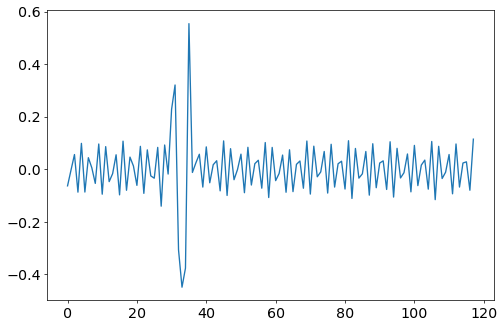

In [ ]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(9, 6), dpi=64)
plt.plot(x_2_s1[0])
plt.show()

W przykładzie tym pokazaliśmy wykorzystanie operacji Conv1D przy zdefiniowaniu stałych wag maski splotu. W uczeniu głębikich sieci soplotowych istotne bnędzie poszukiwanie wag takich masek, które doprowadzą do takiej filtracji sygnałów (zmiany reprezentacji danych) aby uzyskać jak najlepszy wynik określonego zadania uczenia maszynowego (np. klasyfikacji, detekcji, itp.).

W kolejnym przykładzie zajmiemy się dwuwymiarową wersją operacji splotu.


Zachęcam Państwa do dalszego eksperymentowania.

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>